In [9]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA, FactorAnalysis


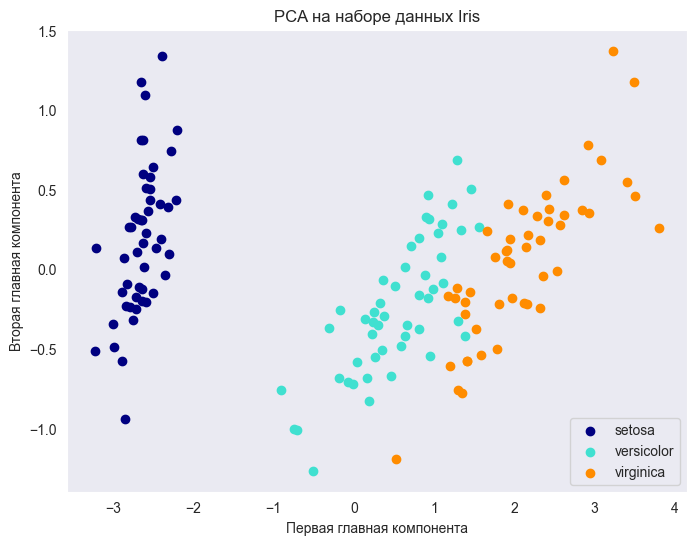

In [10]:
# Задание 1: Применение метода главных компонент (PCA).
# Используйте набор данных "Iris" из sklearn.datasets. Примените PCA, чтобы снизить размерность до 2-х и визуализируйте результаты

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']

for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], label=target_name)

plt.title('PCA на наборе данных Iris')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.legend()
plt.grid()
plt.show()

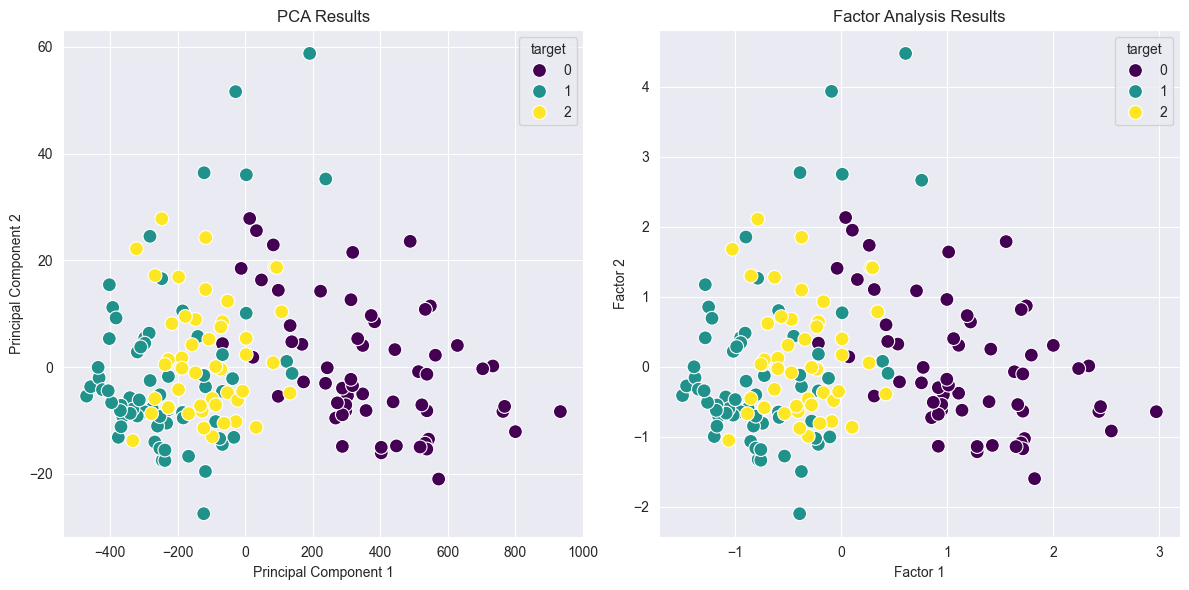

In [11]:
# Задание 2: Сравнение PCA и Factor Analysis.
# Используйте набор данных "Wine" из sklearn.datasets. Примените PCA и 
# Factor Analysis, чтобы снизить размерность до 2-х и визуализируйте различия в результатах

wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

fa_df = pd.DataFrame(X_fa, columns=['FA1', 'FA2'])
fa_df['target'] = y

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='viridis', s=100)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
sns.scatterplot(data=fa_df, x='FA1', y='FA2', hue='target', palette='viridis', s=100)
plt.title('Factor Analysis Results')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')

plt.tight_layout()
plt.show()

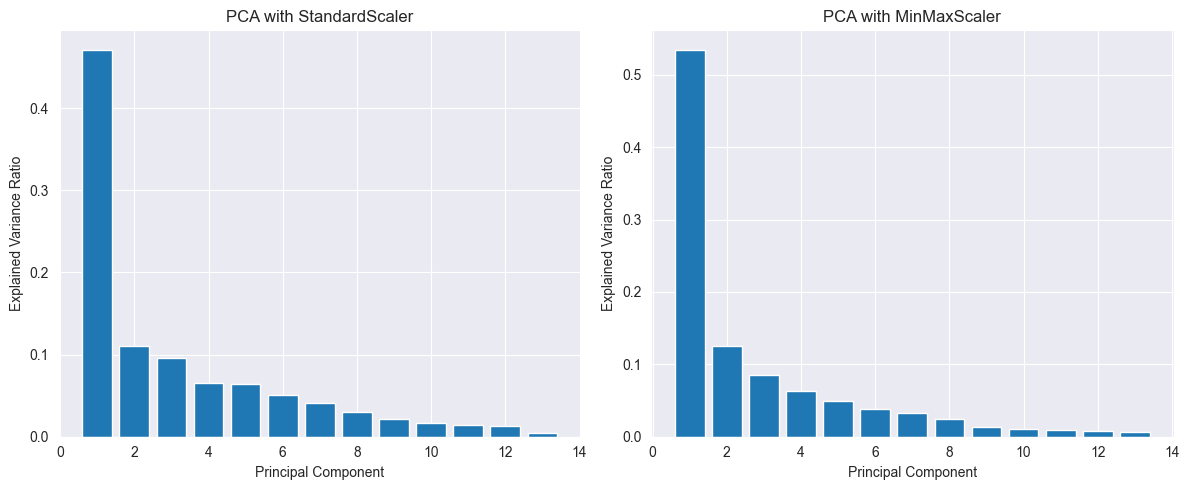

In [16]:
# Задание 3: Исследование влияния предобработки данных на результаты PCA
# Используйте набор данных "Boston Housing" из sklearn.datasets. Примените 
# различные методы предобработки (например, масштабирование, нормализацию) перед применением PCA и сравните полученные результаты

from sklearn.preprocessing import StandardScaler, MinMaxScaler


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
df = pd.DataFrame(data, columns=columns)

scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(df)

scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(df)

pca_standard = PCA()
X_pca_standard = pca_standard.fit_transform(X_standard)

pca_minmax = PCA()
X_pca_minmax = pca_minmax.fit_transform(X_minmax)

explained_variance_standard = pca_standard.explained_variance_ratio_
explained_variance_minmax = pca_minmax.explained_variance_ratio_

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_standard) + 1), explained_variance_standard)
plt.title('PCA with StandardScaler')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.bar(range(1, len(explained_variance_minmax) + 1), explained_variance_minmax)
plt.title('PCA with MinMaxScaler')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.tight_layout()
plt.show()

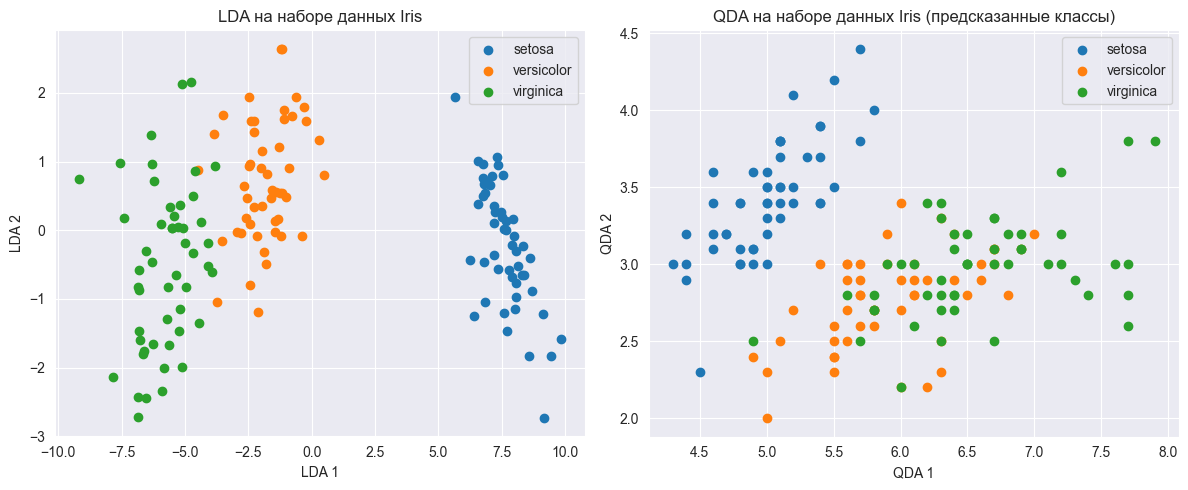

In [21]:
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Задание 4: Применение Disciminant Analysis.
#  Используйте набор данных "Iris" из sklearn.datasets. Примените Linear 
# Discriminant Analysis (LDA) и Quadratic Discriminant Analysis (QDA), чтобы 
# снизить размерность до 2-х и визуализируйте результаты.

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X[:, :2], y) 

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
for i, target_name in enumerate(target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=target_name)
plt.title('LDA на наборе данных Iris')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.legend()

plt.subplot(1, 3, 2)
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name)
plt.title('Исходные данные (первая пара признаков)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()

plt.subplot(1, 3, 3)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=cmap_bold[i], label=target_name, edgecolor='k')
plt.title('Границы классификации QDA')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Задание 5: Сравнение PCA и LDA
# Используйте любой набор данных с классифицирующей моделью. 
# Примените PCA и LDA и сравните, как влияют эти методы снижения 
# размерности на эффективность классификации.


try:
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X = mnist.data[:1000]  
    y = mnist.target.astype(int)[:1000] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pca = PCA(n_components=50)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    classifier_pca = LogisticRegression(max_iter=1000)  # Use Logistic Regression
    classifier_pca.fit(X_train_pca, y_train)
    y_pred_pca = classifier_pca.predict(X_test_pca)

    print("PCA Classification Report:")
    print(classification_report(y_test, y_pred_pca))

    lda = LDA(n_components=9)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)

    classifier_lda = LogisticRegression(max_iter=1000)  # Use Logistic Regression
    classifier_lda.fit(X_train_lda, y_train)
    y_pred_lda = classifier_lda.predict(X_test_lda)

    print("LDA Classification Report:")
    print(classification_report(y_test, y_pred_lda))

except Exception as e:
    print("An error occurred:", e)

PCA Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.90      0.95      0.93        20
           2       0.66      0.86      0.75        22
           3       0.92      0.92      0.92        26
           4       0.82      0.93      0.88        15
           5       0.68      0.76      0.72        17
           6       0.95      0.83      0.88        23
           7       1.00      0.75      0.86        24
           8       0.77      0.77      0.77        13
           9       1.00      0.71      0.83        21

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.87      0.85      0.85       200

LDA Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.67      0.90      0.77        20
           2       0.43 